In [1]:
# Standard library imports:
import csv
from collections import defaultdict

# Need to be installed (but are defaults for Anaconda):
import numpy as np
from scipy.stats import spearmanr, pearsonr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def convert_to_int(answer):
    """
    Convert to integer by removing the text part of the answer (using split),
    and then casting the leading numbers to an int.
    """
    return int(answer.split()[0])


def get_ratings(responses, questions):
    """
    Get ratings for all participants as a dictionary with key=Response ID, value=responses.
    """
    ratings = defaultdict(list)
    for response in responses:
        identifier = response['ResponseId']
        ratings[identifier] = [convert_to_int(response[question]) for question in questions]
    return ratings


def internal_correlations(ratings):
    """
    Compute correlations between users and all other users.
    """
    correlations = dict()
    users = set(ratings.keys())
    for user, scores in ratings.items():
        other_users  = users - {user}
        other_scores = np.array([ratings[key] for key in other_users])
        reference    = np.average(other_scores, axis=0)
        correlation, significance = spearmanr(scores, reference)
        correlations[user] = correlation
    return correlations

In [3]:
# Open the file:
with open("./Responses/RR/RR Survey (rep.study)_May 2, 2022_14.52.csv") as f:
    reader = csv.DictReader(f)
    entries = list(reader)

# Get relevant questions:
relevance = [key for key in entries[0].keys() if "_R_" in key]
coherence = [key for key in entries[0].keys() if "_C_" in key]

# Get all rows with responses:
responses = entries[2:]

# Get the ratings for all participants:
coherence_ratings = get_ratings(responses, coherence)
relevance_ratings = get_ratings(responses, relevance)

In [4]:
# Build index with correlations between user ratings and the average of all other users.
# Do this for coherence and relevance separately:
coherence_index = internal_correlations(coherence_ratings)
relevance_index = internal_correlations(relevance_ratings)

# Combine the two indices into one list of dictionaries.
# Each dictionary corresponds to a respondent:
combined = [dict(user=ident, 
                 coherence=coherence_index[ident],
                 relevance=relevance_index[ident]) for ident in coherence_index]

# Convert to Pandas dataframe:
df = pd.DataFrame(combined)

In [5]:
# Show the table:
df

,user,coherence,relevance
0,R_1BRhhN96MiERFTF,0.304967,0.178250
1,R_RlB2ngsy928cIrD,0.169893,0.253603
2,R_1hToHozh6WbSmqO,0.419505,0.335934
3,R_3HZAbHkBYMgCDCb,0.313500,0.041104
4,R_3q9leLphECsvEVJ,0.549065,0.291455
5,R_egplVXyzMHyavp7,0.343072,0.297323
6,R_1KqhakAXEFY5kC1,0.264952,0.332552
7,R_3qBE22yWny4rqgZ,0.563402,0.378448
8,R_6VYS9Bim1K2hRYd,0.595318,0.342272
9,R_2AQjecvpTcAjmhA,0.289349,0.230465


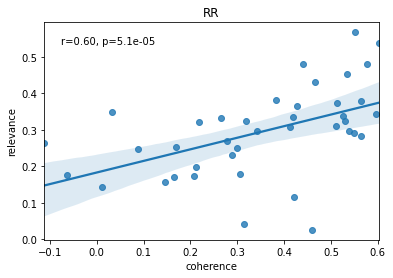

In [6]:
# Plot the responses.
# Each point represents a respondent.
# Both axes correspond to the respondents' correlation with other respondents' responses.
# The top right corner shows respondents who show very similar rating behavior for both types of responses.
# The bottom left corner shows respondents that are very dissimilar.
ax = sns.regplot(data=df, x="coherence", y="relevance")


r, p = spearmanr(df['coherence'], df['relevance'])

ax.set(title="RR")
ax.text(.05, .9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

plt.savefig("Figures/RR-participants.pdf")